 
<div class="alert alert-success">
<b>General feedback v.1</b>
    
 We reviewed your work, and it looks like a true A+. It was a pleasure to review your project. I especially liked the design of the project and your conclusions with additional information! Glad to say that your project has been accepted. I left some comments that probably be useful for you.

    
<br>
Good going!
</div>

---   

<font size="4">**Working with Data in Python**</font><br>


**Introduction** <br>
The goal of this project is to perform an Exploratory data analysis from a data set at first and then testing and  making some inferences through hypotheses.  


## <u>**Exploratory data analysis**</u><br>
In addition to the data you retrieved in the previous tasks, you've been given a second file.<br> 
 You now have these two CSVs:<br>
 
**project_sql_result_01.csv.** It contains the following data:
* **company_name**: taxi company name 
* **trips_amount**: the number of rides for each taxi company on November 15-16, 2017 <br>
 
**project_sql_result_04.csv.** It contains the following data:
* **dropoff_location_name**: Chicago neighborhoods where rides ended
* **average_trips**: the average number of rides that ended in each neighborhood in November 2017.<br>
 
For these two datasets you now need to :
- import the files
- study the data they contain
- make sure the data types are correct
- identify the top 10 neighborhoods in terms of drop-offs
- make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
- draw conclusions based on each graph and explain the results

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v.1</b>

Good start! We have the project and data description, the main goal, the table of contents.
</div>

### <u>**Open the data file and study the general information.**</u> 

In [1]:
#import librairies
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v.1</b> 
    
As a recommendation: it is good practice when the first cell contains all imports used in this project are collected here without any code. This might help: <a href="https://www.python.org/dev/peps/pep-0008/#imports">PEP 8 - Style Guide for Python Code</a> 
</div>

In [2]:
# Study of 1st file 
result1 = pd.read_csv('/datasets/project_sql_result_01.csv')
result1.info()
print('----------- Overall shape of dataframe ------')
print(f"{result1.shape[0]} rows and {result1.shape[1]} columns")
print('----------- Missing values ------------------')
#missing values check
print(result1.isnull().sum() )

display (result1.head(10))

display (result1.tail(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
----------- Overall shape of dataframe ------
64 rows and 2 columns
----------- Missing values ------------------
company_name    0
trips_amount    0
dtype: int64


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


,company_name,trips_amount
54,2192 - 73487 Zeymane Corp,14
55,6057 - 24657 Richard Addo,13
56,5997 - 65283 AW Services Inc.,12
57,Metro Group,11
58,5062 - 34841 Sam Mestas,8
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3
63,3556 - 36214 RC Andrews Cab,2


In [3]:
result1['percent'] = (result1['trips_amount'] / result1['trips_amount'].sum()) * 100

display (result1['percent'].head(5))

display (result1['percent'].tail(5))

 

0    14.243578
1     8.318343
2     7.550014
3     7.201171
4     6.772218
Name: percent, dtype: float64

59    0.005098
60    0.005098
61    0.003641
62    0.002185
63    0.001457
Name: percent, dtype: float64

In this file we have 64 rows and 2 columns , no missing data and the data type seems correct with :<br>
* company_name :    non-null object
* trips_amount :    non-null int64 <br>

In the top 3 :
* **Flash cab** has the most of trips records with 19558 which is **14.2 %** of all values 
* **Taxi Affiliation Services** with 11422 which is **8.3 %** of all values 
* **Medallion Leasing** with 10367 which is **7.5 %** of all values 

At the bottom , we have some companies with  very low values representing less than 1%



<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
Good work! The first dataframe was opened and described!</div>

In [4]:
# Study of 2nd file 
result2 = pd.read_csv('/datasets/project_sql_result_04.csv')
result2.info()
print('----------Overall shape of dataframe----')
 
print(f"{result2.shape[0]} rows and {result2.shape[1]} columns")

print('-----------Missing values------------------')
#missing values check
print(result2.isnull().sum() )

 
display (result2.head(10))

display (result2.tail(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
----------Overall shape of dataframe----
94 rows and 2 columns
-----------Missing values------------------
dropoff_location_name    0
average_trips            0
dtype: int64


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


,dropoff_location_name,average_trips
84,West Pullman,6.466667
85,Montclare,5.766667
86,West Elsdon,5.666667
87,Pullman,3.896552
88,Undef,3.800000
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538
93,Riverdale,1.800000


In [5]:
#removing decimal from trips amounts
result2['average_trips']= result2['average_trips'].astype(int)
 
display (result2.head(10))

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


In [6]:
result2['percent'] = (result2['average_trips'] / result2['average_trips'].sum()) * 100

print ((result2['percent'].head(5)))
print ('--------------------------------')
print ((result2['percent'].tail(5)))

0    19.036042
1    16.899434
2    11.825877
3     9.162215
4     4.518110
Name: percent, dtype: float64
--------------------------------
89    0.005324
90    0.005324
91    0.003549
92    0.001775
93    0.001775
Name: percent, dtype: float64


In this file we have 94 rows and 2 columns , no missing data and we have changed the datatype of average_trips	for calculation purpose from  float64 to int.
In the top 3 :
* **Loop** is the most popular drop off location  with  the highest average  trips records of 10727 which is **19.02 %** of all values 
* **River North** with 9523 which is **16.88 %** of all values 
* **Streeterville** with 6664 which is **11.8 %** of all values 

At the bottom  same as the previous file , we have locations  with  very low values representing less than 1%


<div class="alert alert-success">
<b>Reviewer's comment v.1</b>
    
Good! As a recommendation: the `average_trips` has `float64` type, but for our analysis, we could use the `int` type here, for example, `int16`. We could use the `.astype('int16')` method. It would save resources if we worked with big data.
</div>

### <u>**Identification of the top 10 neighborhoods in terms of drop-offs.**</u> 

In [7]:
#extract top 10 largest results
top_10_neighborhoods=result2.nlargest(10,'average_trips')
#reset index for visual improvement 
top_10_neighborhoods.index = top_10_neighborhoods.index + 1
top_10_neighborhoods

top_10= result2['average_trips'].nlargest(10)

* **The loop** is the most popular drop off location as it is indeed the central business district of the Chicago city gathering multiple retail establishments, restaurants, hotels, and theaters, as well as many of Chicago's most famous attractions.<br>
<br>
* **The river North** comes in second place, it is the city’s hottest nightlife places with trendy bars and clubs.<br>
It is also  a place  for art and design lovers with  multiple art galleries and studios.<br>
<br>
* In third position we have **Streeterville** which displays  a combination of hotels, restaurants, professional office centers, residential venues, universities, medical facilities,cultural attractions and several consulates.

<div class="alert alert-success">
<b>Reviewer's comment v.1</b>
    
Excellent work! Perfect that you used the `.nlargest(10)` method. Thank you for additional information about Chicago's top locations!
</div>

### <u>**Visualization Using Pandas - top 10 neighborhoods by number of dropoffs**</u> 

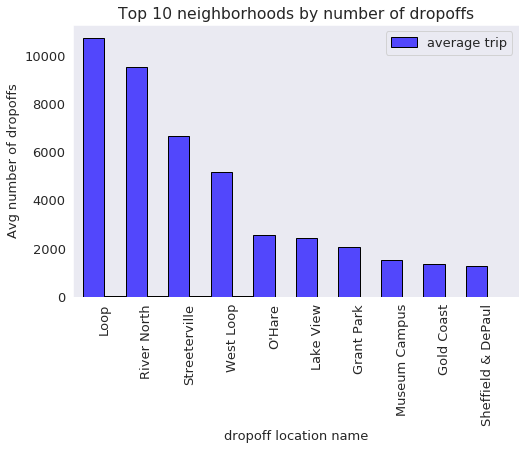

In [8]:
plt.rcParams.update({'font.size': 13})
sns.set_style("dark")
sns.set_palette("rainbow",10)
top_10_neighborhoods.plot(kind="bar",x = 'dropoff_location_name',figsize=(8,5),legend=True,width=1,edgecolor='black') 
plt.legend(['average trip'])
plt.title('Top 10 neighborhoods by number of dropoffs')
plt.xlabel("dropoff location name")

plt.ylabel("Avg number of dropoffs");


**In November 2017 Loop, River North, Streeterville were accounting for almost 50% (47.74%) of the most popular drop off locations in Chicago.**

<div class="alert alert-success">
<b>Reviewer's comment v.1</b>
    
Nice graph!
</div>

### <u>**Visualization Using Pandas -  taxi companies and number of rides**</u> 

In [9]:
 # We are goig also to extract the top 10 taxi companies to narrow down the analysis
top_10_taxi=result1.nlargest(10,'trips_amount')
#reset index for visual improvement 
top_10_taxi.index = top_10_taxi.index + 1
top_10_taxi


,company_name,trips_amount,percent
1,Flash Cab,19558,14.243578
2,Taxi Affiliation Services,11422,8.318343
3,Medallion Leasing,10367,7.550014
4,Yellow Cab,9888,7.201171
5,Taxi Affiliation Service Yellow,9299,6.772218
6,Chicago Carriage Cab Corp,9181,6.686282
7,City Service,8448,6.152457
8,Sun Taxi,7701,5.608436
9,Star North Management LLC,7455,5.429281
10,Blue Ribbon Taxi Association Inc.,5953,4.335414


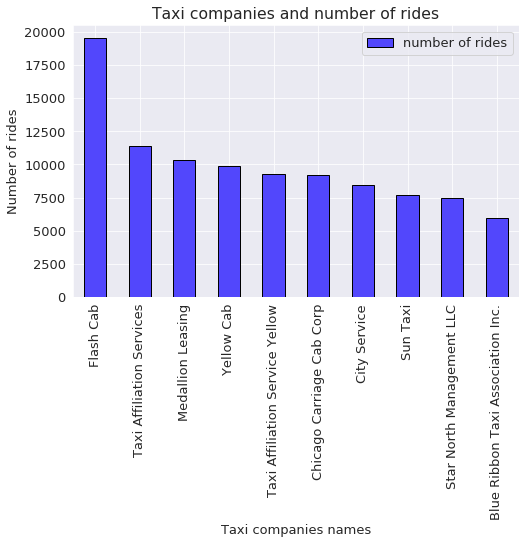

In [10]:
top_10_taxi.plot(kind="bar",x = 'company_name',y='trips_amount', figsize=(8,5),legend=True,width=0.5,edgecolor='black') 
plt.legend(['number of rides'])
plt.title('Taxi companies and number of rides')
plt.xlabel("Taxi companies names")
plt.ylabel("Number of rides")
plt.grid(True, which='both');

**Flash Cab, taxi Affiliation Services and Medallion Leasing were the Top 3 taxi companies with the highest number of rides on November 15-16, 2017 accounting for 30 % of the total number of rides.<br>
Flash Cab is leading confortably with 52% difference with  taxi Affiliation  and over 61% with Medallion Leasing.**


### <u>**Conclusion**</u> 
Overall we had a clean dataset with no missing values and we didn't perform many changes in the format except for of average_trips for calculation purpose from float64 to int. <br>

Loop, River North, Streeterville were accounting for almost 50% of the most popular drop off locations in Chicago.<br>

Those locations are very attractive due to the fact they either have lots of restaurants,hotels,clubs,central business places or cultural venues.<br>

Regarding Taxi companies and number of rides, Flash Cab is the number one and  has recorded itself 19558 trips which is 14.24% of whole total number of rides during that period.<br>

Flash Cab, taxi Affiliation Services and Medallion Leasing were the Top 3 taxi companies with the highest number of rides on November 15-16, 2017 accounting for 30 % of the total number of rides.<br>

Flash Cab has a long history in the market as they are established since 1945 and possess a large fleet of vehicules.
They have solidifed their place in the industry and expanded by acquiring smaller cab companies over the time.<br>



<div class="alert alert-success">
<b>Reviewer's comment v.1</b>
    
The excellent part of the project!
</div>

## <u>**Testing hypotheses (Python)**</u><br>

/datasets/project_sql_result_07.csv — the result of the last query. <br> 
It contains data on rides from the Loop to O'Hare International Airport. <br>

Remember, these are the table's field values: <br>
* **start_ts:** pickup date and time
* **weather_conditions:** weather conditions at the moment the ride started
* **duration_seconds:** ride duration in seconds

<u>Test the hypothesis:</u><br>
**"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."** <br>
Decide where to set the significance level (alpha) on your own.<br>
Explain:<br>
* how you formed the null and alternative hypotheses
* what criterion you used to test the hypotheses and why

### <u>**Open the data file and study the general information**</u> 

In [11]:
rides = pd.read_csv('/datasets/project_sql_result_07.csv')
rides.info();
print('----------- Overall shape of dataframe ------')
print(f"{rides.shape[0]} rows and {rides.shape[1]} columns")
print('----------- Missing values ------------------')
#missing values check
print(rides.isnull().sum() )

display (rides.head(10))

display (rides.tail(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
----------- Overall shape of dataframe ------
1068 rows and 3 columns
----------- Missing values ------------------
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


,start_ts,weather_conditions,duration_seconds
1058,2017-11-25 12:00:00,Good,1440.0
1059,2017-11-11 10:00:00,Good,1303.0
1060,2017-11-04 14:00:00,Good,2700.0
1061,2017-11-18 16:00:00,Bad,2186.0
1062,2017-11-11 06:00:00,Good,1500.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0
1067,2017-11-04 16:00:00,Bad,2834.0


In [12]:
rides.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


We have a file with 1068 rows and 3 columns , no missing values.<br>
* **min duration** : 0
* **max duration** : 7440
* **mean** : 2071.73 

We will need to change the format of the **start_ts** from non-null object to Pd-datetime to be able to extract more detailled information.

### <u>**Data preparation and visualization**</u> 

In [13]:
#converting start_ts from non-null object to Pd-datetime 
rides['start_ts']=pd.to_datetime(rides['start_ts'])

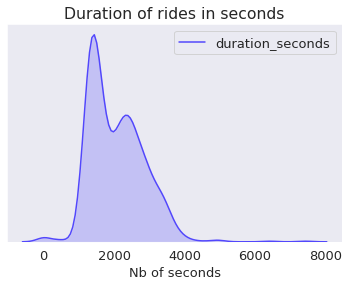

In [14]:
#Visualisation of Duration of rides in seconds'
sns.kdeplot(rides['duration_seconds'],shade=True,legend=True) 
plt.xlabel('Nb of seconds')
plt.title('Duration of rides in seconds')
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

We can see there is a peak around 2000 seconds because it is close to the median 1980s and the  mean which is 2071.73s . <br>
Most of the values are between 1000 and 4000 seconds.<br>
After 4000 seconds we start to distinguish the outliers.


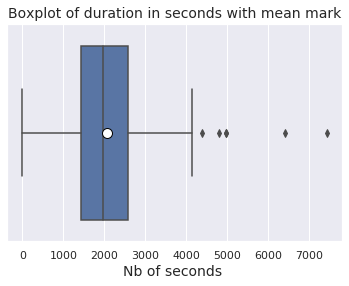

In [15]:
# Further analysis of outliers 
sns.set(style="darkgrid")
sns.boxplot(rides['duration_seconds'],orient="h",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.xlabel("Nb of seconds ", size=14)
plt.title("Boxplot of duration in seconds with mean mark", size=14);


Now we can clearly identify 2 groups of outliers after 4000 and after 6000 seconds.<br>

Also we can identify the mean and median.<br>

We have here a right skewed distribution.<br>


#### <u>**Calculation of averages duration of rides on sunny Saturdays**<u>

In [16]:
# we consider monday as value 0 so saturday = 5 
# extract data where saturdays =    good weather 
rides_no_rain = rides[(rides['weather_conditions'] =='Good')&(rides['start_ts'].dt.weekday==5)] ['duration_seconds'].values   

print("number of rides with good weather on saturdays: ",len (rides_no_rain))
print("average duration  of rides with good weather on saturdays: ",rides_no_rain.mean())


number of rides with good weather on saturdays:  888
average duration  of rides with good weather on saturdays:  1999.6756756756756


#### <u>**Calculation of averages duration of rides on rainy Saturdays**<u>

In [17]:
# we consider monday as value 0 so saturday = 5 
# extract data where saturdays =   rainy
rides_bad = rides[(rides['weather_conditions'] =='Bad')&(rides['start_ts'].dt.weekday==5)] ['duration_seconds'].values  

print("number of rides on rainy saturdays: ",len(rides_bad))
print("average duration  of rides on rainy saturdays:  ",rides_bad.mean())


number of rides on rainy saturdays:  180
average duration  of rides on rainy saturdays:   2427.2055555555557


#### <u>**Conclusion**<u>
After calculation we observed a **higher number of number of rides with good weather on saturdays**:882 compared to rainy Saturdays with only **180** which is quite significant.<br>
On the other side it seems that the **average duration of  rides on rainy saturdays is longer** 2427.205s than on saturdays with good weather  1999.67s, <br>**it represents an increase of 19%**.<br>

<div class="alert alert-success">
<b>Reviewer's comment v.1</b>
    
Well done! Detailed data study.
</div>

### <u>**hypothesis**<u> 
**"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."**<br>

* Decide where to set the significance level (alpha) on your own.<br>
    
Explain:
*  how you formed the null and alternative hypotheses?<br>
* what criterion you used to test the hypotheses and why?

#### <u>**Hypothesis formulation**<u>

**research question** :"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." <br>
* If the p-value is less than 0.05, we reject the null hypothesis that there's no difference between the means and conclude that a significant difference does exist. <br>
* If the p-value is larger than 0.05, we cannot conclude that a significant difference exists. <br>

* p-value<α ⇒ reject H0 : accept H1<br> 

* p-value≥α ⇒ fail to reject H0 <br>
 
	
**sample** => number of rides on rainy saturdays: **180** and number of rides with good weather on saturdays:**882** <br>
**parameter of interest** =>  average duration of rides on rainy saturdays  and average duration of rides on sunny saturdays  <br>

**(H0)null hypothesis** => The null hypothesis (H0) for the test is that  both average durations are the same.<br>
H0:The average duration of rides from the Loop to O'Hare International Airport doesn't change on rainy Saturdays.<br>

**(H1)alternative hypothesis** => The alternative hypothesis is that (H1)= average duration of rides on rainy saturdays differs from average duration of rides on sunny saturdays<br>
H1 : The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

<br>

<div class="alert alert-success">
<b>Reviewer's comment v.1</b>
    
Brilliant! The hypotheses were formulated correctly!

</div>

#### <u>**Hypothesis testing**<u>

In [18]:
#Sample rainy 
sample_rainy = rides_bad
print("number of rides on rainy saturdays: ",len (rides_bad))
print("average duration  of rides on rainy saturdays:  ",rides_bad.mean())


number of rides on rainy saturdays:  180
average duration  of rides on rainy saturdays:   2427.2055555555557


In [19]:
#sample sunny 
sample_sunny=rides_no_rain
print("number of rides with good weather on saturdays: ",len (rides_no_rain))
print("average duration  of rides on saturdays with good weather: ",rides_no_rain.mean())

number of rides with good weather on saturdays:  888
average duration  of rides on saturdays with good weather:  1999.6756756756756


In [20]:
# Testing a hypothesis 
# sample_rainy is the sample from the first statistical sample
# sample_sunny is the sample from the second statistical sample
# equal_var defines whether or not the variances of the samples are considered equal; default value is True 
# alpha = 0.05 ,an alpha of 0.05 is used as the cutoff for significance, 
#which means our output should be 95% confident to give similar kind of result in each sample.

from scipy import stats as st
sample_sunny 
sample_rainy 
alpha = 0.05   
 
results = st.ttest_ind(
    sample_sunny,
    sample_rainy) 


print('p-value:',results.pvalue)
if results.pvalue < alpha:
      print("we rejected the null hypothesis (H0):the average duration of rides from the Loop to O'Hare International Airport \n changes on rainy Saturdays.")
      print("average duration  of rides on rainy saturdays :  ",rides_bad.mean())
      print("average duration  of rides with good weather on saturdays: ",rides_no_rain.mean())
else:
      print("we failed to reject the null hypothesis (H0) that average durationsof rides from the Loop to O'Hare International Airport \n changes on rainy Saturdays.")
      print("average duration  of rides on rainy saturdays:  ",rides_bad.mean())
      print("average duration  of rides on saturdays with good weather : ",rides_no_rain.mean())


p-value: 6.517970327099473e-12
we rejected the null hypothesis (H0):the average duration of rides from the Loop to O'Hare International Airport 
 changes on rainy Saturdays.
average duration  of rides on rainy saturdays :   2427.2055555555557
average duration  of rides with good weather on saturdays:  1999.6756756756756


#### <u>**Conclusion**<u>

* For this  hypothesis on the Equality of the Means of Two Samples we applied the method spicy.stats.ttest_ind().

* We verified  that the samples were taken  with similar parameters.

* We decided  to use the p-value to decide whether or not to reject the null hypothesis.

* Finally we estimated that 5% was sufficient as conventionnal threshold in our analysis.

**Because of the result p-value: 6.517970327099473e-12 we rejected H0 and also we checked the means that's why  we could conclude that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.**


<div class="alert alert-success">
<b>Reviewer's comment v.1</b>
    
Well done! As an additional task - we could also analyze the time of rides and compare the same time range for bad and good weather. 
</div>

## <u>**General conclusion**</u> 

Through this study we managed to draw conclusions from previous SQL queries which enabled us to perform a detailed Exploratory data analysis in Python and Test hypothesis.<br>

We had a clean dataset with no missing values which helped us to quickly analyse the data.<br>

**Loop, River North, Streeterville were accounting for almost 50% of the most popular drop off locations in Chicago.**

**Flash Cab, taxi Affiliation Services and Medallion Leasing were the Top 3 taxi companies with the highest number of rides on November 15-16, 2017 accounting for 30 % of the total number of rides.**

The **average duration of a ride** is  : 2071.73 seconds which is around **34 minutes.**

In the second part of the study we focused on the averages durations of rides on rainy saturdays and sunny saturdays.

We observed that there was a **higher number  of rides with good weather on saturdays**:882 compared to rainy Saturdays 180.
It seems that the **average duration of  rides on rainy saturdays takes longer** than on saturdays with good weather. <br>
We calculated an average of **40 minutes** for a ride when it rains and **33 minutes** on sunny conditions.

Finally we were able to test hypothesis  on the Equality of the Means of Two Samples via the method spicy.stats.ttest_ind().<br>
**Because of the result p-value: 6.517970327099473e-12 we rejected H0 and we concluded that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.**

"Life is like riding in a taxi. Whether you are going anywhere or not, the meter keeps ticking." John C. Maxwell